# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(34799, 32, 32, 3) (34799,) (12630, 32, 32, 3) (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
print(X_train.shape, X_test.shape)
from collections import Counter

c = Counter( y_train )

print( c.items() )
# Shows that training set is uneven distributed 

(34799, 32, 32, 3) (12630, 32, 32, 3)
dict_items([(0, 180), (1, 1980), (2, 2010), (3, 1260), (4, 1770), (5, 1650), (6, 360), (7, 1290), (8, 1260), (9, 1320), (10, 1800), (11, 1170), (12, 1890), (13, 1920), (14, 690), (15, 540), (16, 360), (17, 990), (18, 1080), (19, 180), (20, 300), (21, 270), (22, 330), (23, 450), (24, 240), (25, 1350), (26, 540), (27, 210), (28, 480), (29, 240), (30, 390), (31, 690), (32, 210), (33, 599), (34, 360), (35, 1080), (36, 330), (37, 180), (38, 1860), (39, 270), (40, 300), (41, 210), (42, 210)])


In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = 39209

# TODO: Number of testing examples.
n_test = 12630

# TODO: What's the shape of an traffic sign image?
image_shape = '32x32x3'

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = 32x32x3
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

3


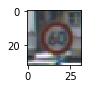

In [4]:
### Data exploration visualization goes here.
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.

## Normalize the data to zero mean and equal variance using pixel depth

print("Min and Max values original train dataset", np.amin(X_train[0]), np.amax(X_train[0]))

pixel_depth = 255
X_train_norm = (X_train.astype(float))/255 -0.5
X_test_norm = (X_test.astype(float))/255 -0.5
# X_train_norm = X_train.astype(float) - 
#                     pixel_depth / 2) / pixel_depth

# X_test_norm = (X_test.astype(float) - 
#                     pixel_depth / 2) / pixel_depth

print("Min and Max values normalized train dataset", np.amin(X_train_norm[0]), np.amax(X_train_norm[0]))

## Shuffle training data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train_norm, y_train)

### Feel free to use as many code cells as needed.
print(y_train[:50])
# Yes! Data is shuffled now 

Min and Max values original train dataset 19 113
Min and Max values normalized train dataset -0.425490196078 -0.056862745098
[ 0 17 15 17  6 10 32  1  3  1 31 18  8 38  1  4  5  7  4 36 36 18 31 25  8
 15  7  9 10  5  5 40 23 20  8 25 12 36  5 10  2 35  2 28  1  5  2  9  4  2]


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer: I applied two steps for data preprocessing - normalize both train and test dataset to have zero mean. As explained in the tensorflow lesson, neural networks perform much better if the inputs are normalized. I performed this normalization by substracting pixel_depth/2 from input and dividing by pixel depth. Post normalization, the input values are b/w -0.5 and 0.5 In addition to normalizing, I also shuffled X_train and y_train since there are 43 classes in the dataset and we want the data to be randomly distributed **

In [6]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.cross_validation import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
X_train, y_train, test_size=0.2, random_state=2275)

print("train dataset", X_train.shape, y_train.shape)
print("Validation dataset", X_valid.shape, y_valid.shape)

C:\Users\priya\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


train dataset (27839, 32, 32, 3) (27839,)
Validation dataset (6960, 32, 32, 3) (6960,)


In [7]:
print(X_valid[2].shape)

(32, 32, 3)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer: I did not generate additional data since my validation accuracy using original data is above 98%. The dataset provided is split into train dataset of 39209 points and test data set of 12630 points. I further split the train dataset into a training set with 80% sample - 31367 points and a validation set of 20% sample - 7842 points. The validation set will be used while training the model to ensure model is not being overfit. Once the model is built, I will run it over the test dataset to check accuracy on a sample never before seen by the model. I expect accuracy to be lower on the test dataset than on the validation dataset and the value of this accuracy is an indication on how well the model generalizes to data not seen before.   **

In [8]:
### Define your architecture here.
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 128
dropout = 0.70
### Feel free to use as many code cells as needed.

In [9]:
## Lets start with LeNet architecture
from tensorflow.contrib.layers import flatten

def LeNet(x, add_dropout = False):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='conv1')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID', name='conv2') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Add another convolution layer
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Add dropout
    if add_dropout:
        fc1 = tf.nn.dropout(fc1, dropout)
    

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Add dropout
    if add_dropout:
        fc2 = tf.nn.dropout(fc2, dropout)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    regularizers = (tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc1_b) + tf.nn.l2_loss(fc2_W) + tf.nn.l2_loss(fc2_b) + tf.nn.l2_loss(fc3_W) + tf.nn.l2_loss(fc3_b))
    
    return logits, regularizers

In [10]:
## Create placeholders for input tensors
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
num_labels = 43
# sparse_labels = tf.reshape(y, [-1, 1])
# derived_size = tf.shape(sparse_labels)[0]
# indices = tf.reshape(tf.range(0, derived_size, 1), [-1, 1])
# concated = tf.concat(1, [indices, sparse_labels])
# outshape = tf.concat(0, [tf.reshape(derived_size, [1]), tf.reshape(num_labels, [1])])
# one_hot_y = tf.sparse_to_dense(concated, outshape, 1.0, 0.0)
one_hot_y = tf.one_hot(y, 43)

In [11]:
# Define learning rate and the training pipeline 
rate = 0.001 # Learning rate
factor = 5e-4 # Regularization factor

logits, regularizers = LeNet(x, add_dropout = False)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)

# L2 regularization for the fully connected parameters. Add regularization to loss term

loss_operation += factor * regularizers
    
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [12]:
# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
softmax=tf.nn.softmax(logits)
prediction=tf.argmax(logits,1)

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    pred = []
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y})
        predictions = sess.run(prediction, feed_dict={x: batch_x, y: batch_y})
        pred.append(predictions)
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x)) 
    return total_accuracy / num_examples, pred, total_loss / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:I decided to use the LeNet archictecture for this model. As seen below in the training step, this achieves fairly high accuracy (98%+) on the validation set. The Lenet architecture starts with a convolution layer with patch size of 5x5, stride of 1 and a depth of 6. The convolution layer is multiplied by a RELU activation. After the convolution layer is a max pool layer with kernel size of 2 and stride of 2. The model has another set of convolution + max pool layer with similar patch size, stride and kernel size but with a depth of 16. This layer also uses Relu activation. Finally the model has 3 fully connected layers including the output layer. The three fully connected layers have 400, 120 and 84 neurons respectively and use Relu activation b/w them. The output layer returns an output of length 43 corresponding to the possible classes in labels  **

In [13]:
### Train your model here.
val_accuracy = []
train_accuracy = []
val_loss =[]
train_loss = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy, _ , validation_loss = evaluate(X_valid, y_valid)
        training_accuracy, _, training_loss = evaluate(X_train, y_train)
        val_accuracy.append(validation_accuracy)
        val_loss.append(validation_loss)
        train_accuracy.append(training_accuracy)
        train_loss.append(training_loss)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.736

EPOCH 2 ...
Validation Accuracy = 0.898

EPOCH 3 ...
Validation Accuracy = 0.934

EPOCH 4 ...
Validation Accuracy = 0.948

EPOCH 5 ...
Validation Accuracy = 0.965

EPOCH 6 ...
Validation Accuracy = 0.966

EPOCH 7 ...
Validation Accuracy = 0.967

EPOCH 8 ...
Validation Accuracy = 0.976

EPOCH 9 ...
Validation Accuracy = 0.979

EPOCH 10 ...
Validation Accuracy = 0.977

EPOCH 11 ...
Validation Accuracy = 0.980

EPOCH 12 ...
Validation Accuracy = 0.979

EPOCH 13 ...
Validation Accuracy = 0.981

EPOCH 14 ...
Validation Accuracy = 0.977

EPOCH 15 ...
Validation Accuracy = 0.981

EPOCH 16 ...
Validation Accuracy = 0.984

EPOCH 17 ...
Validation Accuracy = 0.979

EPOCH 18 ...
Validation Accuracy = 0.980

EPOCH 19 ...
Validation Accuracy = 0.980

EPOCH 20 ...
Validation Accuracy = 0.979

EPOCH 21 ...
Validation Accuracy = 0.985

EPOCH 22 ...
Validation Accuracy = 0.986

EPOCH 23 ...
Validation Accuracy = 0.986

EPOCH 24 ...
Validation Accura

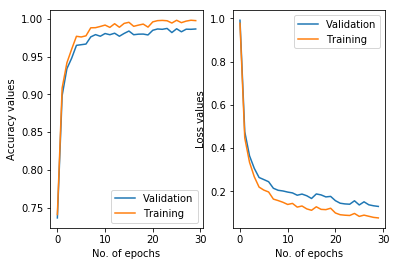

In [14]:
# Plot training and validation loss and accuracies 

plt.figure(figsize=(20,10))
fig = plt.figure()
a=fig.add_subplot(121)
line_one, = plt.plot(val_accuracy, label='Validation')
line_two, = plt.plot(train_accuracy, label = 'Training')
plt.ylabel('Accuracy values')
plt.xlabel('No. of epochs')
plt.legend(handles=[line_one, line_two])

a=fig.add_subplot(122)
line_one, = plt.plot(val_loss, label='Validation')
line_two, = plt.plot(train_loss, label = 'Training')
plt.ylabel('Loss values')
plt.xlabel('No. of epochs')
plt.legend(handles=[line_one, line_two])

In [15]:
# Check performance on out of sample test dataset

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy, pred, _ = evaluate(X_test_norm, y_test)
    
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.918


In [16]:
# Look at accuracy on test dataset by class label
import itertools
new_pred = list(itertools.chain.from_iterable(pred)) # Flatten list from the tensorflow
new_pred2 = np.array(new_pred) # Convert list to array

print(len(y_test), len(new_pred2))
#print(y_test[:10], new_pred2[:10])

from sklearn.metrics import classification_report
print(classification_report(y_test, new_pred2))

12630 12630
             precision    recall  f1-score   support

          0       0.86      0.83      0.85        60
          1       0.87      0.97      0.92       720
          2       0.94      0.92      0.93       750
          3       0.93      0.91      0.92       450
          4       0.95      0.94      0.95       660
          5       0.84      0.91      0.87       630
          6       0.95      0.83      0.89       150
          7       0.97      0.77      0.86       450
          8       0.83      0.97      0.90       450
          9       0.97      0.97      0.97       480
         10       0.98      0.97      0.98       660
         11       0.84      0.92      0.88       420
         12       0.99      0.95      0.97       690
         13       1.00      0.98      0.99       720
         14       0.97      0.95      0.96       270
         15       0.86      0.98      0.92       210
         16       0.90      0.99      0.94       150
         17       0.99      0.97 

27
27
27


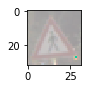

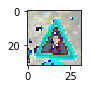

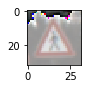

In [17]:
## PLot images corresponding to label class 27
for i in np.where(y_train == 27):
    res_27 = i[:3]

    for i in range(3):
        image = X_train[res_27[i]].squeeze()
        plt.figure(figsize=(1,1))
        plt.imshow(image)
        print(y_train[res_27[i]])

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**
Answer: I have used the LeNet architecture for this model. I started with the default values of hyper parameters shared in the lesson and then modified to identify my optimal settings. For this model I have used a batch size of 128 as that can fit easily in memory. I have used 20 epochs. I found this to be optimal as the accuracy on validation set does not improve after this point. I used Adam optimizer as I found it had better performance than SGD. I experimented with learning rate used in the model and found 0.001 to be the optimal learning rate. I also added L2 regularization to the fully connected layers as this improved performance a little bit. I experimented with introducing dropout to the fully connected layers but found that hurt performance so the final solution does not incorporate dropout
**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:I started with LeNet architecture as it can be a good starting point for various convolution neural networks. Using this architecture I got 98%+ accuracy on the validation dataset so I decided not to further modify this basic architecture. I experimented with introduction of L2 regularization and dropout to the fully connected layers. I found that introduction of regularization improved performance but regularization and dropout hurt performance. Within the model I tuned various hyperparameters by exploring different values for them and identifying the optimal setting. These hyper parameters include 
    1. Optimizer (Adam vs SGD)
    2. Learning Rate for Adam ( 0.01, 0.001, 0.0001)
    3. No of epochs (10, 15, 20, 30)
    4. Regularization rate (5e-4, 1e-4)
    5. Dropout rate (0.25, 0.50)
Once I could not improve the accuracy on the validation dataset, I ran the model on the out of sample test dataset. The model achieved 91.7% accuracy on the test dataset which is quite a bit lower than the validation dataset. To explore why this happened, I created a classification report that displayes precision (accuracy) for different label classes. As can be seen above, some classes have very low accuracy. Class 27 has accuracy around 50% only. This class has very litte sample in the training set (~300 data points). The cell above also plots various images from class 27 and as can be seen images are very blurry. This could also be contributing to poor prediction accuracy.**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [43]:
### Load the images and resize to 32,32
import glob
import os
from PIL import Image
size = 32,32
paths = r'C:\Users\priya\Documents\carnd\Term1\CarND-Traffic-Sign-Classifier-P2\test_images'
new_path = os.path.join(paths,"*.jpg")
for infile in glob.glob(new_path):
    outfile = os.path.splitext(infile)[0] + ".small"    
    file, ext = os.path.splitext(infile)
    im = Image.open(infile).convert('RGB')
    out = im.resize((size))
    out.save(outfile, "JPEG")
### Feel free to use as many code cells as needed.

In [50]:
# Check image format
im = Image.open("test_images/7.small")
print(im.format, im.size, im.mode)

JPEG (32, 32) RGB


In [51]:
## Convert images to a dataset
from scipy import ndimage
new_path = os.path.join(paths,"*.small")
image_size = 32
pixel_depth = 255
image_files = 8
num_channels = 3
dataset = np.ndarray(shape= (image_files, image_size, image_size, num_channels), dtype= np.float32)
target = np.ndarray(shape= (image_files), dtype= np.int_)
for filename in sorted(glob.glob(new_path)):                         
  
  try: 
      image_data = (ndimage.imread(filename, flatten = False).astype(float))/pixel_depth 
      if image_data.shape != (image_size, image_size, num_channels):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      imname = os.path.basename(filename)
      name = int(imname.split(".")[0])
      dataset[name, :, :, :] = image_data
      target[name] = 0
  except IOError as e:
      print('Could not read:', filename, ':', e, '- it\'s ok, skipping.')


In [52]:
# Check Stats on the dataset
print('Dataset shape:', dataset.shape)
print('Target shape:', target.shape)
print('Dataset Mean:', np.mean(dataset))
print('Dataset Standard deviation:', np.std(dataset))
print('Dataset Max:', np.amax(dataset))
print('Dataset Min:', np.amin(dataset))
print('Target shape:', target.shape)

Dataset shape: (8, 32, 32, 3)
Target shape: (8,)
Dataset Mean: 0.464797
Dataset Standard deviation: 0.285668
Dataset Max: 1.0
Dataset Min: 0.0
Target shape: (8,)


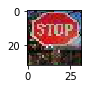

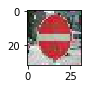

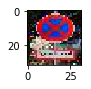

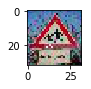

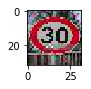

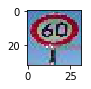

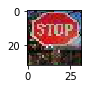

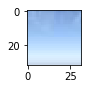

In [56]:
# Display all 19 images
for index in range(dataset.shape[0]):
    image = dataset[index].squeeze()
    plt.figure(figsize=(1,1))
    plt.imshow(image)

In [57]:
## Run model on new images and generate predictions. The predictions were compared with actual using signnames.csv

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy, pred, _ = evaluate(dataset, target)
    
    print(pred)

[array([12, 17, 37,  2,  1, 41, 12, 18], dtype=int64)]


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer: I took 19 new images of different type of traffic signs. All of them are plotted above. Below I have looked at 5 different images and compared the images in the original x_train to the new ones. I think there are several differences which could make classification difficult. Such as:
        1. The original images from the German dataset are not very good quality. They are blurred and it can be difficult to make out the actual sign. See children crossing below as an example
        2. The shape of the sign can be different b/w different countries. See 30km/hr and the left only sign below. If shape is an important feature identifie by CNN then the algorithm will treat these images differently
         **

In [ ]:
### Run the predictions here.

i=0
index_xtrain = []
index_new = [1, 17, 5, 13, 18]

for j in np.where(y_train == 13):
    res_13 = j[:1]
index_xtrain.append(res_13)

for j in np.where(y_train == 1):
    res_1 = j[:1]
index_xtrain.append(res_1)

for j in np.where(y_train == 28):
    res_28 = j[:1]
index_xtrain.append(res_28)

for j in np.where(y_train == 34):
    res_34 = j[:1]
index_xtrain.append(res_34)

for j in np.where(y_train == 14):
    res_14 = j[:1]
index_xtrain.append(res_14)

for i in range(5):
    plt.figure(figsize=(20,20))
    fig = plt.figure()

    a=fig.add_subplot(2,2,1)
    image1 = X_train[index_xtrain[i]].squeeze()
    plt.imshow(image1)
    print(y_train[index_xtrain[i]])
    a.set_title('Original X_train')

    a=fig.add_subplot(2,2,2)
    image1 = dataset[index_new[i]].squeeze()
    plt.imshow(image1)
    a.set_title('New Image')
    
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:The model does not perform well on the new images. Of the 19 images I used, model was correctly able to classify only 3. This is a 15.7% accuracy which is much lower than 92% achieved on the test dataset. The images that it could correctly classify were stop sign, yield sign and no entery sign. I suspect that the model heavily relies on the outer shape of the sign which as seen above is the same for stop sign and yield sign but different for other signs. This is in contrast with humans who rely more on color and information contained in the sign to categorize the sign. Overall this algorithm is not robust to be used in say a different country where signs may be designed differently than Germany '**

In [26]:
### Visualize the softmax probabilities here. Look at predictions on the training set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    accuracy, pred, _ = evaluate(X_train, y_train)

import itertools
new_pred = list(itertools.chain.from_iterable(pred)) # Flatten list from the tensorflow
new_pred2 = np.array(new_pred) # Convert list to array

print(len(y_train), len(new_pred2))

from sklearn.metrics import classification_report
print(classification_report(y_train, new_pred2))
    

27839 27839
             precision    recall  f1-score   support

          0       1.00      0.99      1.00       148
          1       1.00      1.00      1.00      1589
          2       1.00      1.00      1.00      1614
          3       1.00      0.99      0.99      1023
          4       1.00      1.00      1.00      1407
          5       0.99      1.00      0.99      1309
          6       0.99      1.00      0.99       287
          7       1.00      0.99      0.99      1030
          8       0.99      1.00      0.99      1010
          9       1.00      1.00      1.00      1065
         10       1.00      1.00      1.00      1417
         11       1.00      1.00      1.00       912
         12       1.00      1.00      1.00      1518
         13       1.00      0.99      1.00      1561
         14       1.00      1.00      1.00       546
         15       0.99      1.00      0.99       427
         16       1.00      1.00      1.00       296
         17       1.00      1.00 

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:I have used predictions from tensorflow and sklearn classification report to visualize model predictions by class. As seen above there are many classes for which the model prediction accuracy is 100%. The most uncertain predictions are for class 1 and class 32 with prediction accuracy of around 96%. Yes the model was incorrect for class 28 above where it predicted with 100% accuracy on the training set but couldn't accurately predict on the new image**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

Step 4 (Optional): Visualize the Neural Network's State with Test Images
This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.
Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the LeNet lab's feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.
For an example of what feature map outputs look like, check out NVIDIA's results in their paper End-to-End Deep Learning for Self-Driving Cars in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

In [29]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry


def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
    plt.show()

(32, 32, 3)


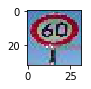

In [41]:
n = random.randint(0, len(X_valid))
#image_input = X_valid[n]

image_input = dataset[5]
# Plot what we are passing to the network
plt.figure(figsize=(1,1))
plt.imshow(image_input)
print(image_input.shape)


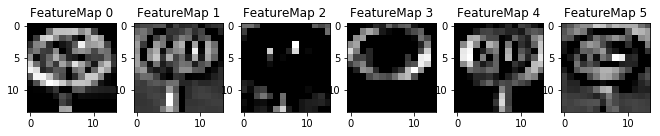

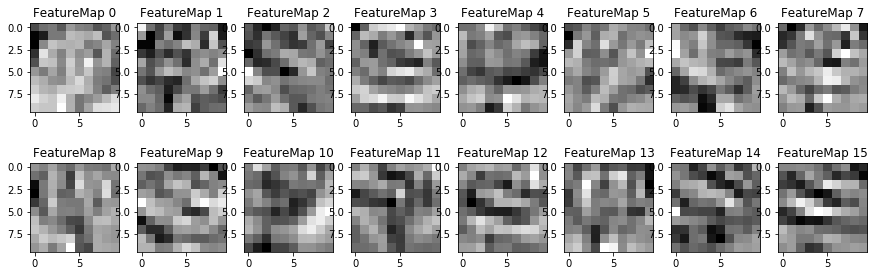

In [42]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    image_input = image_input.reshape(1,32,32,3)
    conv_layer_1_visual = sess.graph.get_tensor_by_name('conv1:0')
    outputFeatureMap(image_input,conv_layer_1_visual)
    
    conv_layer_2_visual = sess.graph.get_tensor_by_name('conv2:0')
    outputFeatureMap(image_input,conv_layer_2_visual)


(32, 32, 3)


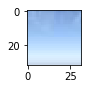

In [58]:
image_test = dataset[7]
# Plot what we are passing to the network
plt.figure(figsize=(1,1))
plt.imshow(image_test)
print(image_test.shape)

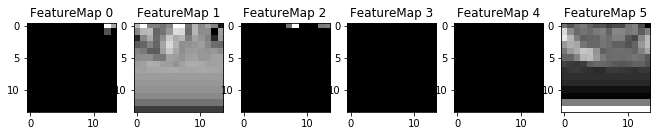

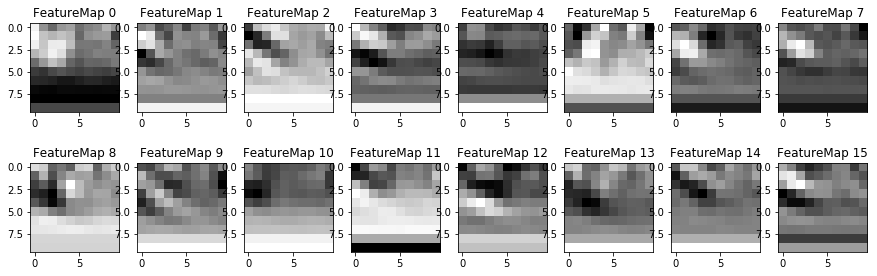

In [59]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    image_test = image_test.reshape(1,32,32,3)
    conv_layer_1_visual = sess.graph.get_tensor_by_name('conv1:0')
    outputFeatureMap(image_test,conv_layer_1_visual)
    
    conv_layer_2_visual = sess.graph.get_tensor_by_name('conv2:0')
    outputFeatureMap(image_test,conv_layer_2_visual)
